# Regresión Lineal:

## Ingeniería de Atributos (Feature Engineering)

La ingeniería de atributos es el proceso de utilizar el conocimiento del dominio de los datos para crear atributos o variables que se pueden usar en el aprendizaje automático. La ingeniería de atributos es fundamental para que los modelos de aprendizaje automático hagan predicciones precisas e incluye, desde completar datos faltantes dentro de una variable hasta transformación variable mediante funciones o discretización, codificación de variables categóricas y creación de nuevas variables a partir de variables existentes.


<img src="figuras/IngenieriaAtributos.png" width="75%"/>

Por lo general, un **atributo** es una representación específica sobre los datos sin procesar, que es una propiedad individual medible, representado típicamente por una columna en un conjunto de datos.

Algunas citas relevantes para la ingeniería de atributos de varias personas de renombre en el mundo de la Ciencia de Datos.

- _Prof. Andrew Ng_:

> "Encontrar los atributos es difícil, lleva mucho tiempo, requiere conocimiento experto. _Aprendizaje automático aplicado_ es básicamente ingeniería de atributos".

- _Dr. Jason Brownlee_:

> "La ingeniería de atributos es el proceso de transformar datos brutos en los atributos que mejor representan el problema subyacente a los modelos predictivos, lo que resulta en una mejor precisión del modelo en datos no vistos". 

- _Prof. Pedro Domingos_:

>"Al final del día, algunos proyectos de aprendizaje automático tienen éxito y algunos fracasan. ¿Qué hace la diferencia? Fácilmente, el factor más importante son los atributos utilizadas ".

- _Xavier Conort_:

> "Los algoritmos que usamos son muy estándar para Kagglers. ... Dedicamos la mayor parte de nuestros esfuerzos en la ingeniería de atributos. ... También fuimos muy cuidadosos al descartar los atributos que probablemente nos expongan al riesgo de sobreajustar nuestro modelo ".

En el caso de la regresión múltiple se incluyen atributos diferentes (por ejemplo, número de dormitorios, pies cuadrados y número de baños), pero también podemos considerar las transformaciones de los atributos existentes, por ejemplo, el logaritmo de los pies cuadrados e incluso "interacción" entre atributos como el producto de dormitorios y baños.



## Evaluar los modelos usando RSS (Suma al Cuadrado de los Residuales)

Una medida de evaluación de los modelos es la suma al cuadrado de los residuales, donde residual es la diferencia entre los valores reales de la salida y las predicciones:

$$RSS = \sum_{i=1}^{N}(\hat{y}_i-y_i)^2$$

Si dividimos RSS por el número de observaciones, obtenemos el MSE o error cuadrado promedio:

$$MSE = \frac{1}{N}\sum_{i=1}^{N}(\hat{y}_i-y_i)^2$$

Si tomamos la raiz cuadrada del MSE obtendremos el RMSE o raiz cuadrada del error cuadrado promedio:

$$RMSE = \sqrt{\frac{1}{N}\sum_{i=1}^{N}(\hat{y}_i-y_i)^2}$$


In [1]:
# importar
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from math import log, sqrt
# Esto permite que los gráficos aparezcan directamente en el cuaderno
%matplotlib inline

# Cargar algunos datos de ventas de casas
Los datos son de las ventas de casas en el Condado de King, la región donde se encuentra la ciudad de Seattle

In [2]:
ventas = pd.read_csv('datos/kc_house_data.csv')

## Crear un modelo de regresión multiple con `sqft_living`, `bedrooms`, `bathrooms` y `price`

Dividir datos en entrenamiento y prueba.

In [3]:
from sklearn.model_selection import train_test_split
atributos_cols = ['sqft_living', 'bedrooms', 'bathrooms']
X = ventas[atributos_cols]
y = ventas.price
X_entrenamiento, X_prueba, y_entrenamiento, y_prueba = train_test_split(
    X, y, random_state=0)

Instanciar el modelo de regresión lineal y llamar la función de ajuste

In [4]:
# seguir el patron de uso de sklearn: importar, instanciar, ajustar
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_entrenamiento, y_entrenamiento)

# imprimir intercepto y coeficientes
print (lm.intercept_)
print (lm.coef_)

72730.96392812347
[   310.84340649 -54376.31667078   2498.26665289]


Evaluar el modelo

In [5]:
lm.score(X_prueba, y_prueba)

0.5003571796501294

Realizar las predicciones

In [6]:
predicciones = lm.predict(X_prueba)
predicciones[0:5] - y_prueba[0:5]

17384    115231.801844
722     -263016.227833
2680    -148633.464081
18754   -313770.353429
14554     69953.396510
Name: price, dtype: float64

## Calcular RSS

Ahora que podemos hacer predicciones dado el modelo, vamos a escribir una función para calcular el RSS del modelo.

In [7]:
def obtener_RSS(modelo, datos, salida):
    # Primero obtener las predicciones
    predicciones = modelo.predict(datos)
    # Calcular los residuales 
    residuales = salida - predicciones
    # Elevarlos al cuadrado y sumarlos
    RSS = (residuales * residuales).sum()
    return(RSS) 

Calcular RSS, MSE y RMSE del modelo

In [8]:
RSS = obtener_RSS(lm, X_prueba, y_prueba)
MSE = RSS/(len(y_prueba))
RMSE = sqrt(MSE)
print('RSS = ', RSS)
print('MSE = ', MSE)
print('RMSE =', RMSE)

RSS =  358678859678731.06
MSE =  66372845980.52018
RMSE = 257629.2801304234


## Crear algunos nuevos atributos

Utilizaremos la función logaritmo para crear una nuevo atributo. Por lo que primero se debe importar de la biblioteca de matemáticas.

A continuación, crear los siguientes 4 nuevos atributos como columna en los datos de Entrenamiento y Prueba:
- bedrooms_squared = bedrooms * bedrooms
- bed_bath_rooms = bedrooms * bathrooms
- log_sqft_living = log(sqft_living)
- lat_plus_long = lat + long

In [9]:
# bedrooms_squared
ventas['bedrooms_squared'] = ventas['bedrooms'].apply(lambda x: x**2)
# bed_bath_rooms
ventas['bed_bath_rooms'] = ventas['bedrooms'] * ventas['bathrooms']
# log_sqft_living
ventas['log_sqft_living'] = ventas['sqft_living'].apply(lambda x: log(x))
# lat_plus_long
ventas['lat_plus_long'] = ventas['lat'] + ventas['long']

In [10]:
ventas.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,bedrooms_squared,bed_bath_rooms,log_sqft_living,lat_plus_long
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,0,98178,47.5112,-122.257,1340,5650,9,3.00,7.073270,-74.7458
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,1991,98125,47.7210,-122.319,1690,7639,9,6.75,7.851661,-74.5980
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,0,98028,47.7379,-122.233,2720,8062,4,2.00,6.646391,-74.4951
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,0,98136,47.5208,-122.393,1360,5000,16,12.00,7.580700,-74.8722
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,0,98074,47.6168,-122.045,1800,7503,9,6.00,7.426549,-74.4282


## Aprender múltiples modelos

Ahora aprenderemos los pesos de tres modelos para la predicción de los precios de las viviendas. El primer modelo tendra menos atributos, el segundo tendra más atributos y el tercer aún más:

* Modelo 1: pies cuadrados, # cuartos, # baños, latitud y longitud
* Modelo 2: agregar cuartos\*baños
* Modelo 3: agregar logaritmo de pies cuadrados, cuartos al cuadrado, y latitud + longitud

In [11]:
atributos_modelo_1 = ['sqft_living', 'bedrooms', 'bathrooms', 'lat', 'long']
atributos_modelo_2 = atributos_modelo_1 + ['bed_bath_rooms']
atributos_modelo_3 = atributos_modelo_2 + ['bedrooms_squared', 'log_sqft_living', 'lat_plus_long']

Entrenar los modelos

In [12]:
# Modelo 1
X = ventas[atributos_modelo_1]
y = ventas.price
X_entrenamiento_1, X_prueba_1, y_entrenamiento_1, y_prueba_1 = train_test_split(
    X, y, random_state=0)
modelo_1 = LinearRegression()
modelo_1.fit(X_entrenamiento_1, y_entrenamiento_1)

# Modelo 2
X = ventas[atributos_modelo_2]
y = ventas.price
X_entrenamiento_2, X_prueba_2, y_entrenamiento_2, y_prueba_2 = train_test_split(
    X, y, random_state=0)
modelo_2 = LinearRegression()
modelo_2.fit(X_entrenamiento_2, y_entrenamiento_2)

# Modelo 3
X = ventas[atributos_modelo_3]
y = ventas.price
X_entrenamiento_3, X_prueba_3, y_entrenamiento_3, y_prueba_3 = train_test_split(
    X, y, random_state=0)
modelo_3 = LinearRegression()
modelo_3.fit(X_entrenamiento_3, y_entrenamiento_3)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

Imprimir los coefficientes de los modelos

In [13]:
# imprimir intercepto y coeficientes de los modelos
print ('Intercepto del modelo 1: ', modelo_1.intercept_)
print ('Coeficientes del modelo 1: ', modelo_1.coef_)
print ('-----')
print ('Intercepto del modelo 2: ', modelo_2.intercept_)
print ('Coeficientes del modelo 2: ', modelo_2.coef_)
print ('-----')
print ('Intercepto del modelo 3: ', modelo_3.intercept_)
print ('Coeficientes del modelo 3: ', modelo_3.coef_)

Intercepto del modelo 1:  -69608916.95726308
Coeficientes del modelo 1:  [ 3.10566733e+02 -5.10367183e+04  1.05379831e+04  6.58338538e+05
 -3.13738189e+05]
-----
Intercepto del modelo 2:  -67659382.42910394
Coeficientes del modelo 2:  [ 3.05252753e+02 -9.62486642e+04 -6.36695424e+04  6.55305007e+05
 -3.00246407e+05  2.18523473e+04]
-----
Intercepto del modelo 3:  -61836300.07724376
Coeficientes del modelo 3:  [ 5.27027733e+02  6.00015664e+03  1.00904040e+05  5.30241264e+05
 -4.04817684e+05 -1.93276059e+04  7.30538627e+02 -5.49137385e+05
  1.25423580e+05]


Evaluar los modelos usando la función `score()`

In [14]:
print('Modelo 1: ', modelo_1.score(X_prueba_1, y_prueba_1))
print('Modelo 2: ', modelo_2.score(X_prueba_2, y_prueba_2))
print('Modelo 3: ', modelo_3.score(X_prueba_3, y_prueba_3))

Modelo 1:  0.58318364073149
Modelo 2:  0.5902005376018937
Modelo 3:  0.6098700229835656


Evaluar los modelos usando RSS sobre el conjunto de entrenamiento

In [15]:
print('RSS del modelo 1: ', obtener_RSS(modelo_1, X_entrenamiento_1, y_entrenamiento_1))
print('RSS del modelo 2: ', obtener_RSS(modelo_2, X_entrenamiento_2, y_entrenamiento_2))
print('RSS del modelo 3: ', obtener_RSS(modelo_3, X_entrenamiento_3, y_entrenamiento_3))

RSS del modelo 1:  893961175725604.5
RSS del modelo 2:  887518277002359.5
RSS del modelo 3:  837547939204509.5


Evaluar los modelos usando RSS sobre el conjunto de prueba

In [16]:
print('RSS del modelo 1: ', obtener_RSS(modelo_1, X_prueba_1, y_prueba_1))
print('RSS del modelo 2: ', obtener_RSS(modelo_2, X_prueba_2, y_prueba_2))
print('RSS del modelo 3: ', obtener_RSS(modelo_3, X_prueba_3, y_prueba_3))

RSS del modelo 1:  299220183596716.3
RSS del modelo 2:  294182960073325.5
RSS del modelo 3:  280062816042785.25


## Seleccionar el grado del polinomio de la Regresión Polinomial, usando un conjunto de validación

Vamos a aplicar una técnica para la selección del grado del polinomio.

Esta técnica es la de dividir el conjunto de datos en tres conjuntos: uno de entrenamiento, uno de validación y uno de prueba.

- Primero dividiremos los datos en un conjunto de Entrenamiento_Validación y uno de Prueba
- Segundo dividiremos el conjunto de Entrenamineto_Validación en uno de Entrenamiento y uno de Validación

In [17]:
ventas.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,bedrooms_squared,bed_bath_rooms,log_sqft_living,lat_plus_long
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,0,98178,47.5112,-122.257,1340,5650,9,3.00,7.073270,-74.7458
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,1991,98125,47.7210,-122.319,1690,7639,9,6.75,7.851661,-74.5980
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,0,98028,47.7379,-122.233,2720,8062,4,2.00,6.646391,-74.4951
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,0,98136,47.5208,-122.393,1360,5000,16,12.00,7.580700,-74.8722
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,0,98074,47.6168,-122.045,1800,7503,9,6.00,7.426549,-74.4282


In [18]:
X = ventas[['sqft_living', 'price']]
y = ventas.price
X_entrenamiento_validacion, X_prueba, y_entrenamiento_validacion, y_prueba = train_test_split(
    X, y, random_state=0)
X_entrenamiento, X_validacion, y_entrenamiento, y_validacion = train_test_split(
    X_entrenamiento_validacion, y_entrenamiento_validacion, random_state=0)

Usaremos la función: `polinomial_dataframe(atributo, grado)`

In [19]:
def polinomial_dataframe(atributo, grado):
    # asumir que grado es >= 1
    # inicializar el DataFrame:
    poli_dataframe = pd.DataFrame()
    # fijar poli_dataframe['potencia_1'] igual al atributo pasado
    poli_dataframe['potencia_1'] = atributo
    # chequear si grado > 1
    if grado > 1:
        # realizar un lazo con los grados restantes:
        for potencia in range(2, grado+1): 
            # primero le damos el nombre a la columna:
            nombre = 'potencia_' + str(potencia)
            # luego asignamos a poli_dataframe[nombre] la potencia del atributo apropiada
            poli_dataframe[nombre] = atributo**potencia
    return poli_dataframe

Ahora ejecutaremos un lazo de 1 a 15. Donde crearemos un modelo para cada uno de los grados del polinomio.

Y calcularemos el RSS de cada uno para seleccionar el modelo con el valor de RSS menor.

In [20]:
rss = []
potencias = list(range(1, 15+1))

for grado in potencias:
    poli_data_X = polinomial_dataframe(X_entrenamiento.sqft_living, grado)
    poli_validacion_X = polinomial_dataframe(X_validacion.sqft_living, grado)
    modelo = LinearRegression()
    modelo.fit(poli_data_X, y_entrenamiento)
    rss.append(obtener_RSS(modelo, poli_validacion_X, y_validacion))
rss    

[260505781895110.06,
 245450866121813.12,
 244533267461319.56,
 249410525542365.44,
 246225208129882.12,
 246432029153208.12,
 246521262113335.12,
 246507255171751.56,
 246463224687802.75,
 246740053577533.62,
 246763520150289.2,
 246972883418959.94,
 246989437199364.22,
 247113545240350.03,
 247094504626728.34]

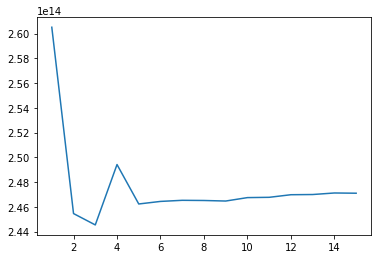

In [21]:
plt.plot(potencias, rss)

Seleccionar el grado del polinomio con el valor mínimo de RSS

In [22]:
grado = np.argmin(rss) + 1
grado

3

Ahora que hemos seleccionado el grado del polinomio con los datos de validación.

Calcularemos el RSS con los datos de prueba

In [23]:
poli_data_X = polinomial_dataframe(X_entrenamiento.sqft_living, grado)
poli_prueba_X = polinomial_dataframe(X_prueba.sqft_living, grado)
modelo = LinearRegression()
modelo.fit(poli_data_X, y_entrenamiento)
rss = obtener_RSS(modelo, poli_prueba_X, y_prueba)
print (sqrt(rss/len(poli_prueba_X)))

250004.0999751144


Agregar una nueva columna al conjunto de datos que contenga `sqft_living` elevado al grado correspondiente al valor mínimo del RSS

In [31]:
ventas['sqft_living**grado'] = ventas['sqft_living'].apply(lambda x: x**grado)
atributos_cols = ['sqft_living**grado', 'sqft_living', 'bedrooms', 'bathrooms']
X = ventas[atributos_cols]
y = ventas.price
X_entrenamiento, X_prueba, y_entrenamiento, y_prueba = train_test_split(
    X, y, random_state=0)

In [32]:
lm = LinearRegression()
lm.fit(X_entrenamiento, y_entrenamiento)

# imprimir intercepto y coeficientes
print (lm.intercept_)
print (lm.coef_)

128085.11979641032
[ 1.90820004e-06  2.44265303e+02 -4.37746082e+04  1.09294380e+04]


In [33]:
lm.score(X_prueba, y_prueba)

0.5324888964126959

Podemos observar que al agregar esta nuevo atributo se mejoro el `score` del modelo con respecto al modelo que solo contenia los atributos `sqft_living`, `bedrooms`, y `bathrooms`.

`score = 0.5003571796501294`

### Referencias

- Curso de Coursera [Machine Learning: Regression](https://www.coursera.org/learn/ml-regression)